<a href="https://colab.research.google.com/github/pkhushi0510/Big-Data-Lab/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1-1086478518.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pnl.index, y=avg_pnl.values, palette='viridis')


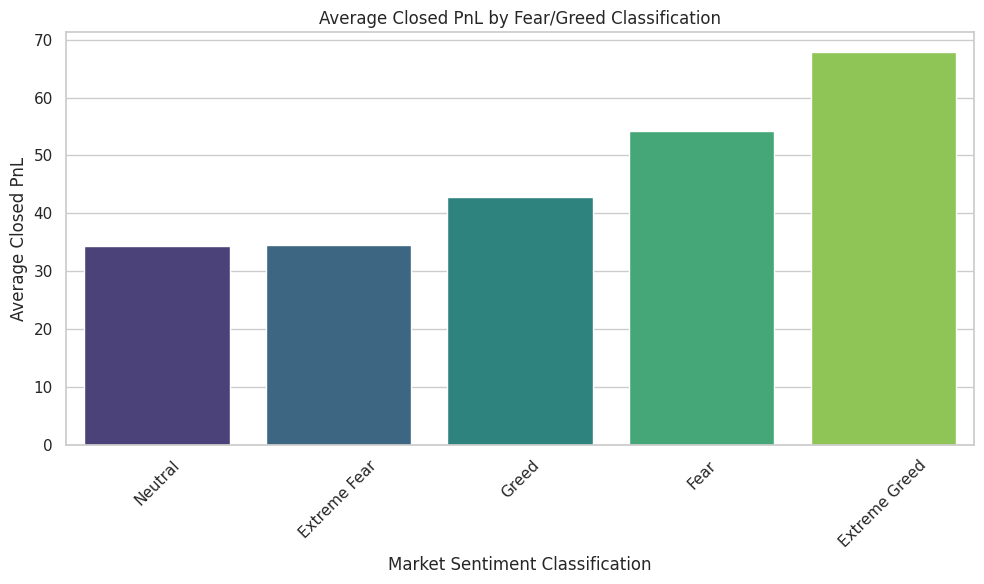

In [1]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🗂️ Load the datasets (Upload in Colab manually or mount from Drive)
fear_greed_df = pd.read_csv('fear_greed_index.csv')
historical_data_df = pd.read_csv('historical_data.csv')

# 📅 Date conversion
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])
historical_data_df['Timestamp IST'] = pd.to_datetime(historical_data_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
historical_data_df['date'] = historical_data_df['Timestamp IST'].dt.date
fear_greed_df['date_only'] = fear_greed_df['date'].dt.date

# 🔗 Merge datasets
merged_df = pd.merge(historical_data_df, fear_greed_df, left_on='date', right_on='date_only', how='left')
merged_df.drop(columns=['date_only'], inplace=True)

# 📊 Plot average PnL vs Sentiment Classification
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean().sort_values()
sns.barplot(x=avg_pnl.index, y=avg_pnl.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Average Closed PnL by Fear/Greed Classification')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Average Closed PnL')
plt.tight_layout()
plt.show()


In [2]:
# Statistical Summary by Sentiment
print("Statistical Summary Grouped by Market Sentiment:")
print(merged_df.groupby('classification')['Closed PnL'].describe())


Statistical Summary Grouped by Market Sentiment:
                  count       mean          std           min  25%  50%  \
classification                                                            
Extreme Fear    21400.0  34.537862  1136.056091  -31036.69194  0.0  0.0   
Extreme Greed   39992.0  67.892861   766.828294  -10259.46800  0.0  0.0   
Fear            61837.0  54.290400   935.355438  -35681.74723  0.0  0.0   
Greed           50303.0  42.743559  1116.028390 -117990.10410  0.0  0.0   
Neutral         37686.0  34.307718   517.122220  -24500.00000  0.0  0.0   

                      75%           max  
classification                           
Extreme Fear     5.635032  115287.00000  
Extreme Greed   10.028709   44223.45187  
Fear             5.590856  135329.09010  
Greed            4.944105   74530.52371  
Neutral          3.995795   48504.09555  


/tmp/ipython-input-3-2086549973.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classification', y='Closed PnL', data=merged_df, palette='Set2')


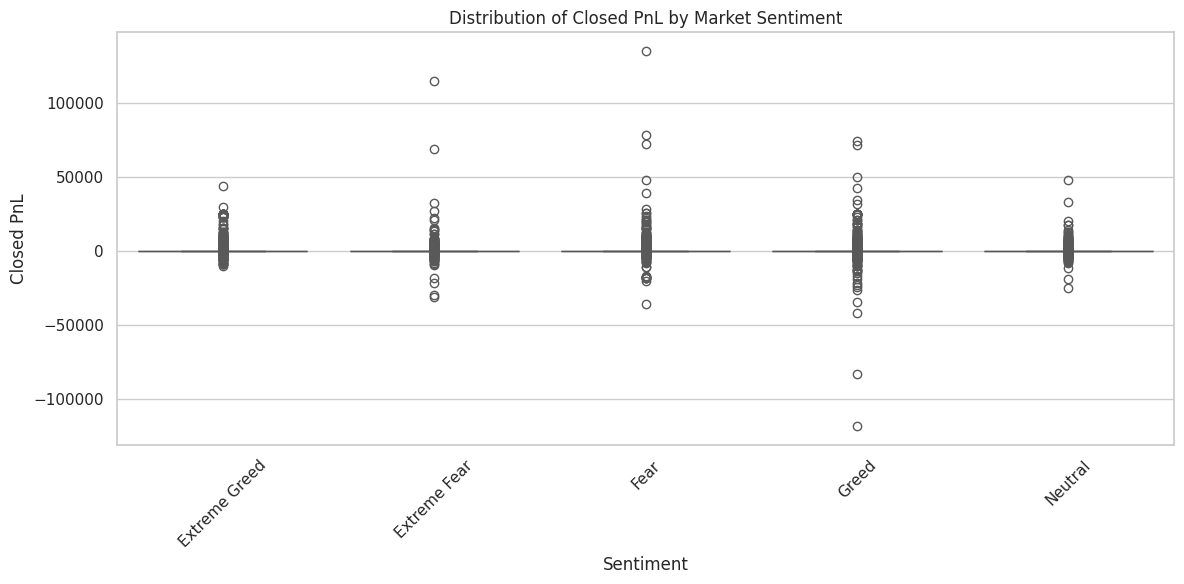

In [3]:
#Boxplot: PnL Distribution Across Sentiments
plt.figure(figsize=(12, 6))
sns.boxplot(x='classification', y='Closed PnL', data=merged_df, palette='Set2')
plt.title('Distribution of Closed PnL by Market Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Closed PnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


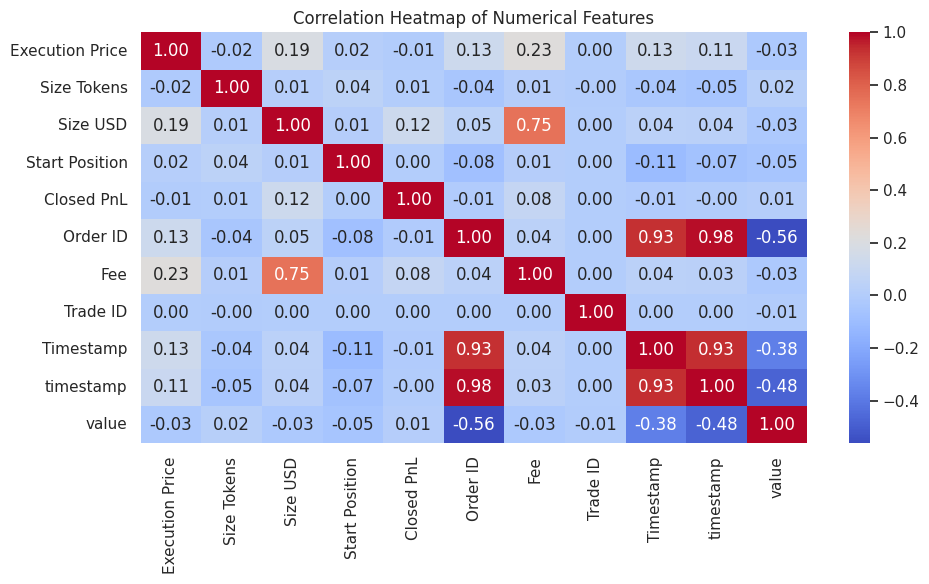

In [8]:
#Correlation Heatmap
plt.figure(figsize=(10, 6))
num_cols = merged_df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(num_cols, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


Time Series Trend of Average PnL

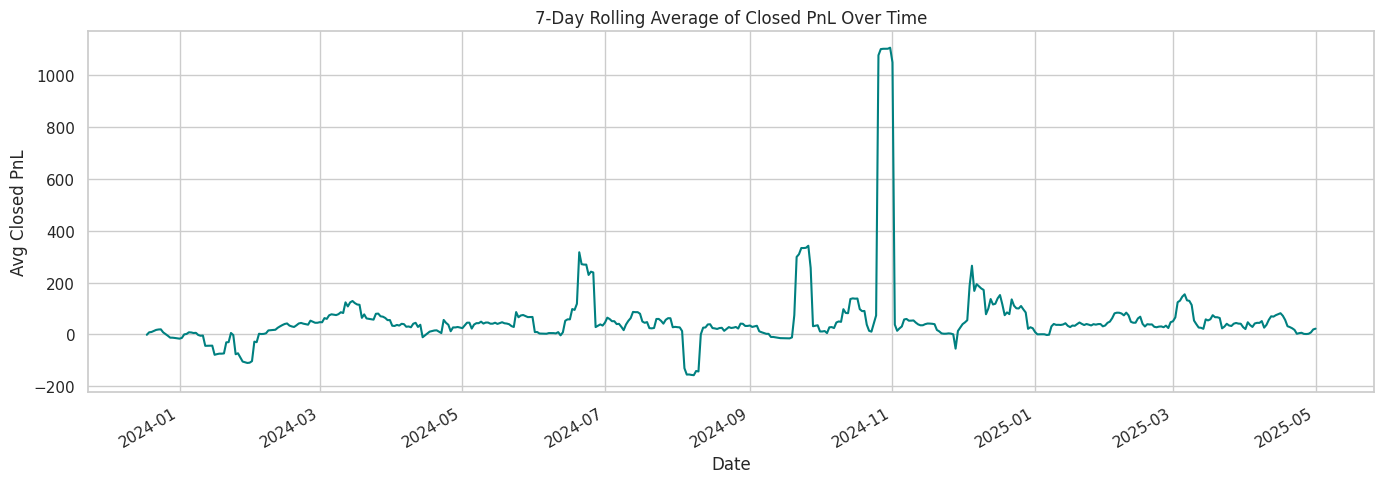

In [6]:
merged_df['date_x'] = pd.to_datetime(merged_df['date_x'])
daily_pnl = merged_df.groupby('date_x')['Closed PnL'].mean().rolling(window=7).mean()

plt.figure(figsize=(14, 5))
daily_pnl.plot(color='teal')
plt.title('7-Day Rolling Average of Closed PnL Over Time')
plt.xlabel('Date')
plt.ylabel('Avg Closed PnL')
plt.tight_layout()
plt.show()

 Trade Count by Sentiment

/tmp/ipython-input-7-2269752386.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trade_volume.index, y=trade_volume.values, palette='cubehelix')


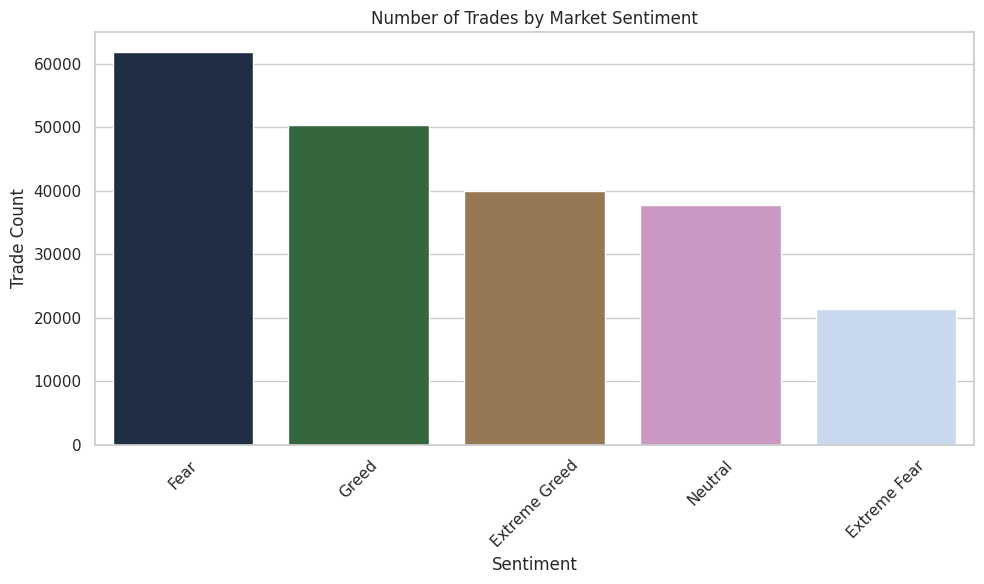

In [7]:
plt.figure(figsize=(10, 6))
trade_volume = merged_df['classification'].value_counts()
sns.barplot(x=trade_volume.index, y=trade_volume.values, palette='cubehelix')
plt.title('Number of Trades by Market Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Trade Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
